# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(0.1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | manismata
Processing Record 5 of Set 1 | volgodonsk
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | constantia
Processing Record 11 of Set 1 | malabar
Processing Record 12 of Set 1 | ta`u
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | irymple
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | macau
Processing Record 18 of Set 1 | nova sintra
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | mili
Processing Record 22 of Set 1 | ka

Processing Record 39 of Set 4 | kapuskasing
Processing Record 40 of Set 4 | port lincoln
Processing Record 41 of Set 4 | remire-montjoly
Processing Record 42 of Set 4 | san patricio
Processing Record 43 of Set 4 | severodvinsk
Processing Record 44 of Set 4 | chinde
Processing Record 45 of Set 4 | tianpeng
Processing Record 46 of Set 4 | ardabil
Processing Record 47 of Set 4 | nyurba
Processing Record 48 of Set 4 | santa elena de uairen
Processing Record 49 of Set 4 | gracemere
Processing Record 0 of Set 5 | ancud
Processing Record 1 of Set 5 | lauro de freitas
Processing Record 2 of Set 5 | silver city
Processing Record 3 of Set 5 | wailua homesteads
Processing Record 4 of Set 5 | haiku-pauwela
Processing Record 5 of Set 5 | malango
Processing Record 6 of Set 5 | cabinda
Processing Record 7 of Set 5 | soroti
Processing Record 8 of Set 5 | christchurch
Processing Record 9 of Set 5 | blythe
Processing Record 10 of Set 5 | moratalla
Processing Record 11 of Set 5 | isangel
Processing Recor

Processing Record 33 of Set 8 | khovd
Processing Record 34 of Set 8 | kongwa
Processing Record 35 of Set 8 | ibiza
Processing Record 36 of Set 8 | lansing
Processing Record 37 of Set 8 | santiago de cao
Processing Record 38 of Set 8 | yangor
City not found. Skipping...
Processing Record 39 of Set 8 | fomboni
Processing Record 40 of Set 8 | kruisfontein
Processing Record 41 of Set 8 | midvagur
Processing Record 42 of Set 8 | biloela
Processing Record 43 of Set 8 | rio grande
Processing Record 44 of Set 8 | port alfred
Processing Record 45 of Set 8 | amqui
Processing Record 46 of Set 8 | kerikeri
Processing Record 47 of Set 8 | sao gabriel da cachoeira
Processing Record 48 of Set 8 | saint-philippe
Processing Record 49 of Set 8 | hauterive
Processing Record 0 of Set 9 | mpika
Processing Record 1 of Set 9 | kings point
Processing Record 2 of Set 9 | flying fish cove
Processing Record 3 of Set 9 | motueka
Processing Record 4 of Set 9 | alofi
Processing Record 5 of Set 9 | quatre cocos
Proc

Processing Record 22 of Set 12 | devinuwara
City not found. Skipping...
Processing Record 23 of Set 12 | prince rupert
Processing Record 24 of Set 12 | miquelon
Processing Record 25 of Set 12 | saudarkrokur
Processing Record 26 of Set 12 | presidente medici
Processing Record 27 of Set 12 | northam
Processing Record 28 of Set 12 | constitucion
Processing Record 29 of Set 12 | musay'id
City not found. Skipping...
Processing Record 30 of Set 12 | manicore
Processing Record 31 of Set 12 | ambon
Processing Record 32 of Set 12 | taksimo
Processing Record 33 of Set 12 | bata
Processing Record 34 of Set 12 | iron river
Processing Record 35 of Set 12 | seogwipo
City not found. Skipping...
Processing Record 36 of Set 12 | thal
Processing Record 37 of Set 12 | tayaman
Processing Record 38 of Set 12 | rodolfo sanchez taboada
Processing Record 39 of Set 12 | nagqu
Processing Record 40 of Set 12 | nadi
Processing Record 41 of Set 12 | sorong
Processing Record 42 of Set 12 | saint-francois
----------

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.50,95,100,16.09,TF,1726527276
1,bethel,41.3712,-73.4140,20.31,79,100,0.45,US,1726527278
2,margaret river,-33.9500,115.0667,12.25,71,0,1.67,AU,1726527279
3,manismata,-2.4667,111.0333,23.26,91,64,1.06,ID,1726527280
4,volgodonsk,47.5136,42.1514,18.00,39,4,5.79,RU,1726527281


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.50,95,100,16.09,TF,1726527276
1,bethel,41.3712,-73.4140,20.31,79,100,0.45,US,1726527278
2,margaret river,-33.9500,115.0667,12.25,71,0,1.67,AU,1726527279
3,manismata,-2.4667,111.0333,23.26,91,64,1.06,ID,1726527280
4,volgodonsk,47.5136,42.1514,18.00,39,4,5.79,RU,1726527281


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

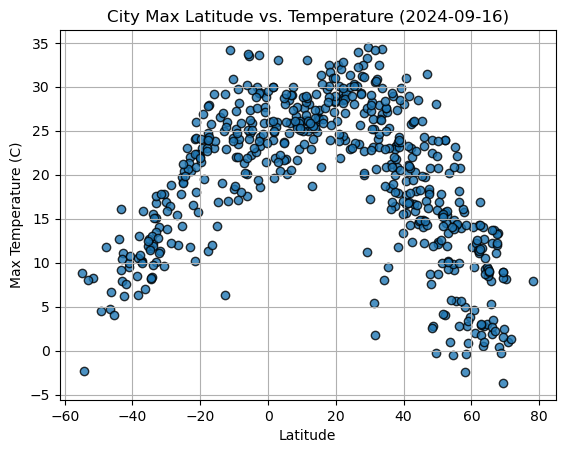

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

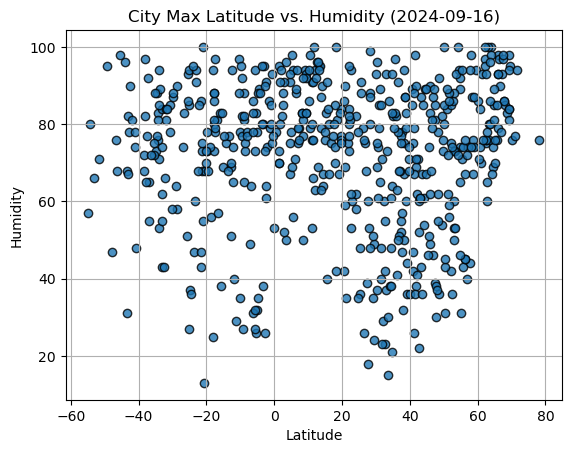

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

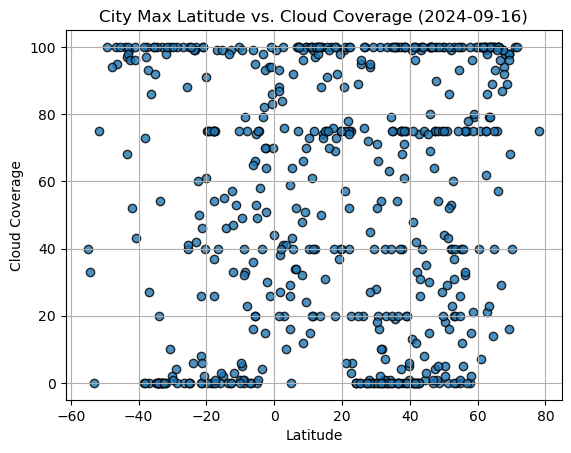

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloud Coverage (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

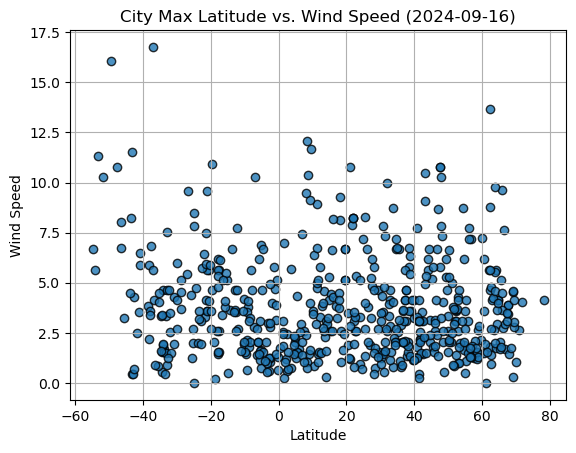

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x, y, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(df[x], df[y])
    print(f"The r-value is: {r_value}")
    df.plot.scatter(x, y)

    # Create regression line values
    regress_values = df[x] * slope + intercept
    plt.plot(df[x], regress_values, "r-")

    # decide location for annotation
    miny = df[y].min()
    height = df[y].max() - miny
    regress_begin = df[x].min() * slope + intercept
    if (regress_begin - miny) / height < 0.5:
        loc = (0.05, 0.90)
    else:
        loc = (0.05, 0.05)
    
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, loc, xycoords="axes fraction", fontsize=15, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,20.31,79,100,0.45,US,1726527278
4,volgodonsk,47.5136,42.1514,18.00,39,4,5.79,RU,1726527281
6,yellowknife,62.4560,-114.3525,16.90,75,75,4.63,CA,1726527283
9,constantia,44.1833,28.6500,14.38,61,8,5.62,RO,1726527287
12,kodiak,57.7900,-152.4072,15.73,44,0,1.22,US,1726527291


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.50,95,100,16.09,TF,1726527276
2,margaret river,-33.9500,115.0667,12.25,71,0,1.67,AU,1726527279
3,manismata,-2.4667,111.0333,23.26,91,64,1.06,ID,1726527280
5,luderitz,-26.6481,15.1594,11.97,83,0,9.56,NaN,1726527282
7,adamstown,-25.0660,-130.1015,19.13,85,100,8.49,PN,1726527284


###  Temperature vs. Latitude Linear Regression Plot

In [30]:
# Linear regression on Northern Hemisphere
# Northern Hemisphere: Latitude vs. Max Temperature
plot_linear_regression(
    northern_hemi_df,
    "Lat",
    "Max Temp",
    "Latitude",
    "Max Temperature (F)",
    "Linear Regression on Latitude vs. Max Temperature (Northern Hemisphere)",
)

In [33]:
# Linear regression on Southern Hemisphere
# Southern Hemisphere: Latitude vs. Max Temperature
plot_linear_regression(
    southern_hemi_df
    "Lat",
    "Max Temp",
    "Latitude",
    "Max Temperature (C)",
    "Linear Regression on Latitude vs. Max Temperature (Southern Hemisphere)",
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df
    "Lat",
    "Humidity",
    "Latitude",
    "Humidity",
    "Linear Regression on Latitude vs. Humidity (Northern Hemisphere)",
)

In [ ]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df
    "Lat",
    "Max Temp",
    "Latitude",
    "Max Temperature (F)",
    "Linear Regression on Latitude vs. Humidity (Southern Hemisphere)",
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df
    "Lat",
    "Cloudiness",
    "Latitude",
    "Cloud Coverage",
    "Linear Regression on Latitude vs. Cloud Coverage (Northern Hemisphere)",
)

In [ ]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df
    "Lat",
    "Cloudiness",
    "Latitude",
    "Cloud Coverage",
    "Linear Regression on Latitude vs. Cloud Coverage (Southern Hemisphere)",
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [36]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df
    "Lat",
    "Wind Speed",
    "Latitude",
    "Wind Speed",
    "Linear Regression on Latitude vs. Wind Speed (Northern Hemisphere)",
)

In [38]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df
    "Lat", 
    "Wind Speed", 
    "Latitude",
    "Wind Speed",
    "Linear Regression on Latitude vs. Wind Speed (Southern Hemisphere)",
)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE